Linear Regression MSE: 315368.2008789408
Polynomial Regression (Degree 2) MSE: 288263.8288940983


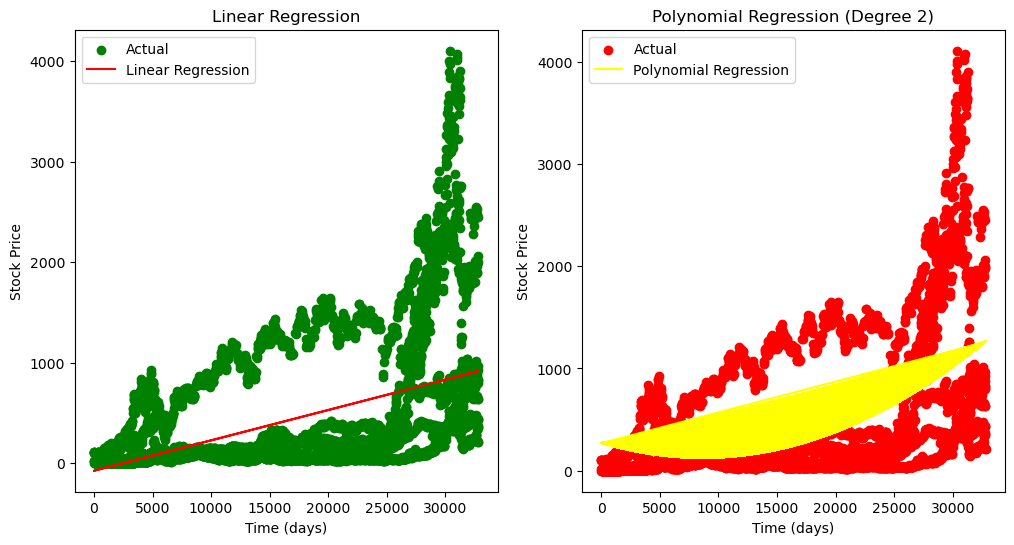

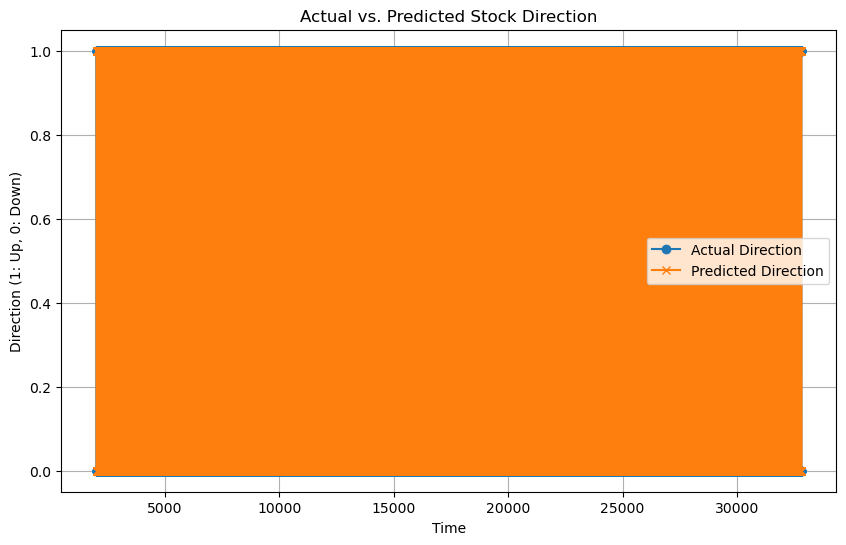

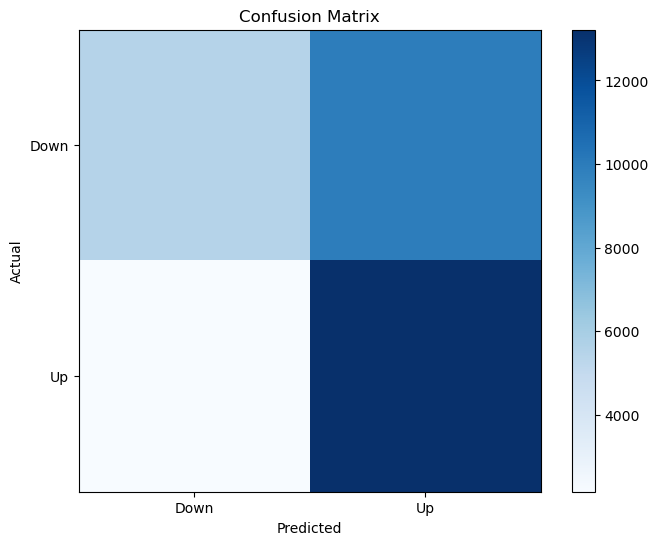

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

df = pd.read_csv('adani.csv')

df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

time = np.arange(1, len(df) + 1).reshape(-1, 1)  
stock_prices = df['close'].values

if np.isnan(stock_prices).any():
    valid_indices = ~np.isnan(stock_prices)
    time = time[valid_indices]
    stock_prices = stock_prices[valid_indices]

X_train, X_test, y_train, y_test = train_test_split(time, stock_prices, test_size=0.2, random_state=0)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear}")

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(time)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, stock_prices, test_size=0.2, random_state=0)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_poly)
y_pred_poly = poly_reg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
print(f"Polynomial Regression (Degree 2) MSE: {mse_poly}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='green', label='Actual')
plt.plot(X_test, y_pred_linear, color='red', label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('Time (days)')
plt.ylabel('Stock Price')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.plot(X_test, y_pred_poly, color='yellow', label='Polynomial Regression')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('Time (days)')
plt.ylabel('Stock Price')
plt.legend()

plt.show()
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

df = pd.read_csv('adani.csv')

df_filter = df["close"].pct_change() * 100
df_filter = df_filter.rename("Today")
df_filter = df_filter.reset_index()

df_filter["volume"] = df["volume"].shift(1) / 1_000_000_000

for i in range(1, 6):
    df_filter["Lag " + str(i)] = df_filter["Today"].shift(i)

df_filter = df_filter.dropna()

df_filter["Direction"] = [1 if i > 0 else 0 for i in df_filter["Today"]]

X = df_filter[["Lag 1", "Lag 2", "Lag 3", "Lag 4", "Lag 5", "volume"]]
y = df_filter["Direction"]

X_train = X.iloc[:2000]
X_test = X.iloc[2000:]

y_train = y.iloc[:2000]
y_test = y.iloc[2000:]

clf = LogisticRegression().fit(X_train, y_train)

y_pred = clf.predict(X_test)

plt.figure(figsize=(10, 6))

plt.plot(y_test.index, y_test, label='Actual Direction', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Direction', marker='x')

plt.title('Actual vs. Predicted Stock Direction')
plt.xlabel('Time')
plt.ylabel('Direction (1: Up, 0: Down)')
plt.legend()
plt.grid(True)
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Down', 'Up'])
plt.yticks([0, 1], ['Down', 'Up'])
plt.show()